<a href="https://colab.research.google.com/github/UICHANLEE/2023_DataScience/blob/ML/4%EC%9E%A5_%EB%B6%84%EB%A5%98_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
os.environ['KAGGLE_USERNAME'] = 'uichanlee'
os.environ['KAGGLE_KEY'] = '8c543ed4142c36dea50c6e2cd6f4ea8e'

In [3]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 76% 50.0M/66.0M [00:00<00:00, 125MB/s] 
100% 66.0M/66.0M [00:00<00:00, 126MB/s]


In [4]:
!unzip '*.zip'

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

card_df = pd.read_csv('creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [7]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
card_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사 한 뒤 Time만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  df_copy.drop('Time', axis = 1, inplace = True)
  return df_copy

In [11]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수
def get_train_test_dataset (df = None): 
  df_copy = get_preprocessed_df(df)
  X_features = df_copy.iloc[:, :-1]
  y_target = df_copy.iloc[:, -1]
  X_train, X_test, y_train, y_test = \
  train_test_split(X_features, y_target,
                   test_size = 0.3, random_state = 0, stratify = y_target) # stratify = y_target으로 층화추출 => y_target에도 적절한 비율을 유지하며 추출
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [12]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스터 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스터 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import time

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도;{0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}'.format(accuracy, precision, recall, f1))

In [14]:
def get_model_train_eval(model, ftr_train = None, ftr_test = None, tgt_train = None, tgt_test = None): 
  start_time = time.time()
  model.fit(ftr_train, tgt_train)
  pred = model.predict(ftr_test)
  get_clf_eval(tgt_test, pred)
  print("수행시간 : {0:.1f} 초 ".format(time.time() - start_time))

In [15]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter = 900)
get_model_train_eval(lr_clf, ftr_train = X_train, ftr_test = X_test,
                     tgt_train = y_train, tgt_test = y_test)

오차 행렬
[[85280    15]
 [   56    92]]
정확도;0.9992, 정밀도 : 0.8598, 재현율 : 0.6216, F1 : 0.7216
수행시간 : 44.8 초 


In [16]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(nㅁ_estimators = 1000, num_leaves = 64, n_jobs = -1, 
                          boost_from_average = False)
get_model_train_eval(lgbm_clf, ftr_train = X_train, ftr_test = X_test, tgt_train=y_train, tgt_test = y_test)


오차 행렬
[[85290     5]
 [   38   110]]
정확도;0.9995, 정밀도 : 0.9565, 재현율 : 0.7432, F1 : 0.8365
수행시간 : 6.0 초 


In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 1000, n_jobs = -1)
get_model_train_eval(rf_clf, ftr_train = X_train, ftr_test = X_test,
                     tgt_train = y_train, tgt_test = y_test)

KeyboardInterrupt: ignored

# 데이터분포도 변환 후 모델 학습/예측/평가 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


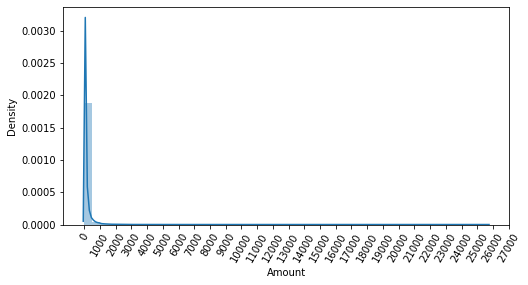

In [18]:
import seaborn as sns

plt.figure(figsize = (8, 4))
plt.xticks(range(0, 30000, 1000), rotation = 60)
sns.distplot(card_df['Amount']) # 카드 결제 금액

In [19]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount피처값을 변환하는 로직
def get_preprocessed_df(df = None):
  df_copy = df.copy()
  scaler = StandardScaler()
  amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time', 'Amount'], axis = 1, inplace = True)
  return df_copy

In [21]:
card_df

,Amount_Scaled,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-0.350151,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,-0.254117,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,-0.081839,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.313249,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


In [30]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [23]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter = 900)
get_model_train_eval(lr_clf, ftr_train = X_train, ftr_test = X_test,
                     tgt_train = y_train, tgt_test = y_test)

from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(nㅁ_estimators = 1000, num_leaves = 64, n_jobs = -1, 
                          boost_from_average = False)
get_model_train_eval(lgbm_clf, ftr_train = X_train, ftr_test = X_test, tgt_train=y_train, tgt_test = y_test)

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 1000, n_jobs = -1)
get_model_train_eval(rf_clf, ftr_train = X_train, ftr_test = X_test,
                     tgt_train = y_train, tgt_test = y_test)

KeyboardInterrupt: ignored

# 이상치 데이터 제거 후 모델 학습/예측/평가
- IQR = Q1~Q3의 구간

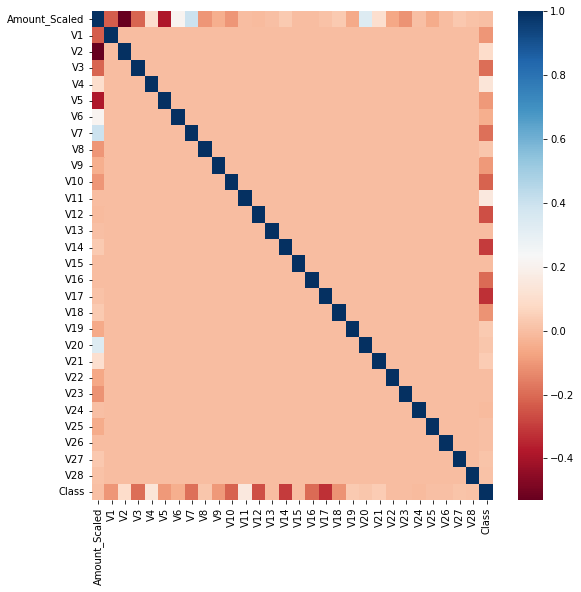

In [24]:
import seaborn as sns
plt.figure(figsize = (9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap = 'RdBu')

In [25]:
import numpy as np

def get_outlier(df = None, column = None, weight = 1.5):
  fraud = df[df['Class'] == 1][column]
  quantile_25 = np.percentile(fraud.values, 25)
  quantile_75 = np.percentile(fraud.values, 75)

  iqr = quantile_75 - quantile_25
  iqr_weight = iqr * weight
  lowest_val = quantile_25 - iqr_weight
  highest_val = quantile_75 + iqr_weight
  outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
  return outlier_index

In [26]:
outlier_index = get_outlier(df=card_df, column = 'V14')
print('이상치 데이터 인덱스', outlier_index)

이상치 데이터 인덱스 Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [27]:
outlier_index = get_outlier(df=card_df, column = 'V17')
print('이상치 데이터 인덱스', outlier_index)

이상치 데이터 인덱스 Int64Index([], dtype='int64')


In [31]:
def get_preprocessed_df(df = None):
  df_copy = df.copy()
  scaler = StandardScaler()
  amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time', 'Amount'], axis = 1, inplace = True)
  # 이상치 데이터 삭제하는 로직 추가
  outlier_index = get_outlier (df = df_copy, column = 'V14', weight = 1.5)
  df_copy.drop(outlier_index, axis = 0, inplace = True)
  return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train = X_train, ftr_test = X_test, tgt_train= y_train, tgt_test = y_test)



### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85279    16]
 [   48    98]]
정확도;0.9993, 정밀도 : 0.8596, 재현율 : 0.6712, F1 : 0.7538
수행시간 : 4.2 초 


# SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가
- 언더 샘플링
- 오버 샘플링

In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 0    199020
1    199020
Name: Class, dtype: int64


In [36]:
print('\n### 로지스틱 회귀예측 성능 ###')
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter = 900)
get_model_train_eval(lr_clf, ftr_train = X_train_over, ftr_test = X_test,
                     tgt_train = y_train_over, tgt_test = y_test)

print('\n ### LightGBM 예측 성능 ###')
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, 
                          boost_from_average = False)
get_model_train_eval(lgbm_clf, ftr_train = X_train_over, ftr_test = X_test, tgt_train=y_train_over, tgt_test = y_test)


### 로지스틱 회귀예측 성능 ###
오차 행렬
[[82936  2359]
 [   11   135]]
정확도;0.9723, 정밀도 : 0.0541, 재현율 : 0.9247, F1 : 0.1023
수행시간 : 12.7 초 

 ### LightGBM 예측 성능 ###
오차 행렬
[[85283    12]
 [   24   122]]
정확도;0.9996, 정밀도 : 0.9104, 재현율 : 0.8356, F1 : 0.8714
수행시간 : 109.7 초 


- 사기를 방지하기 위해서는 로지스틱 회귀예측을 사용할 것.
  - 1을 많이 맞추는 것이 더 중요하기 때문에


# feature별 중요도

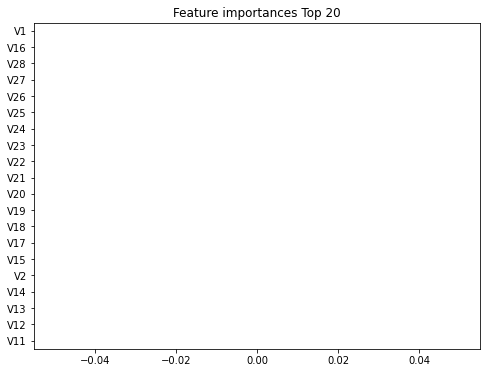

In [40]:
import matplotlib.pyplot as plt

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=card_df.columns[1: -1])
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

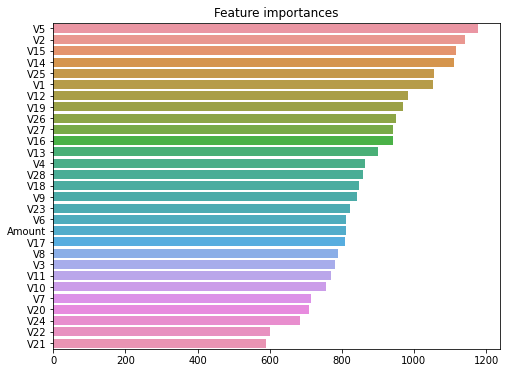

In [44]:
# LightGBM의 feature중요도 시각화
import matplotlib.pyplot as plt

ftr_importances_values = lgbm_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=card_df.columns[1: -1])
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()